# Hotelling T Test and Seemingly Unrelated Regression

## 16 Industires

In [1]:
indus<-read.csv("16indus-mon.csv")

print("---------------Industry Names--------------")
names(indus)
print("---------------Data Dimension--------------")
dim(indus)
print("---------------Time Range--------------")
range(indus[,1]) 

rets <-indus 
NN <- length(indus[1,])-3
rets[,2:(NN+1)]<-rets[,2:(NN+1)]-rets[,(NN+3)] 

par(mgp=c(1.5,0.5,0),oma=c(0,0,1,0.5),mar=c(3,3,2,0))

ybeg<-2005
yend<-2018
zret<-rets[rets[,1]> ybeg*100 & rets[,1]< (yend+1)*100,]
zm  <-apply(zret[,2:(NN+2)],2,mean)*12
zs  <-apply(zret[,2:(NN+2)],2,sd)*sqrt(12)

print("---------------Annulized Return--------------")
zm
print("---------------Annulized Volatility(%)--------------")
zs

[1] "---------------Industry Names--------------"


[1] "date"  "Food"  "Mines" "Oil"   "Clths" "Durbl" "Chems" "Cnsum" "Cnstr"
[10] "Steel" "FabPr" "Machn" "Cars"  "Trans" "Utils" "Rtail" "Finan" "Xrm"  
[19] "Rf"

[1] "---------------Data Dimension--------------"


[1] 1110   19

[1] "---------------Time Range--------------"


[1] 192607 201812

[1] "---------------Annulized Return--------------"


Food    Mines      Oil    Clths    Durbl    Chems    Cnsum    Cnstr 
5.150714 3.242857 3.667857 9.496429 3.111429 7.326429 5.933571 7.179286 
   Steel    FabPr    Machn     Cars    Trans    Utils    Rtail    Finan 
2.455000 7.429286 7.802857 4.635000 8.610714 4.238571 8.139286 2.832857 
     Xrm 
7.370714

[1] "---------------Annulized Volatility(%)--------------"


Food    Mines      Oil    Clths    Durbl    Chems    Cnsum    Cnstr 
10.75809 30.12601 21.17630 20.44740 21.74673 21.70388 11.91502 20.50970 
   Steel    FabPr    Machn     Cars    Trans    Utils    Rtail    Finan 
29.93013 18.52415 19.26513 23.20631 17.32186 12.62667 14.09535 19.86143 
     Xrm 
14.24997

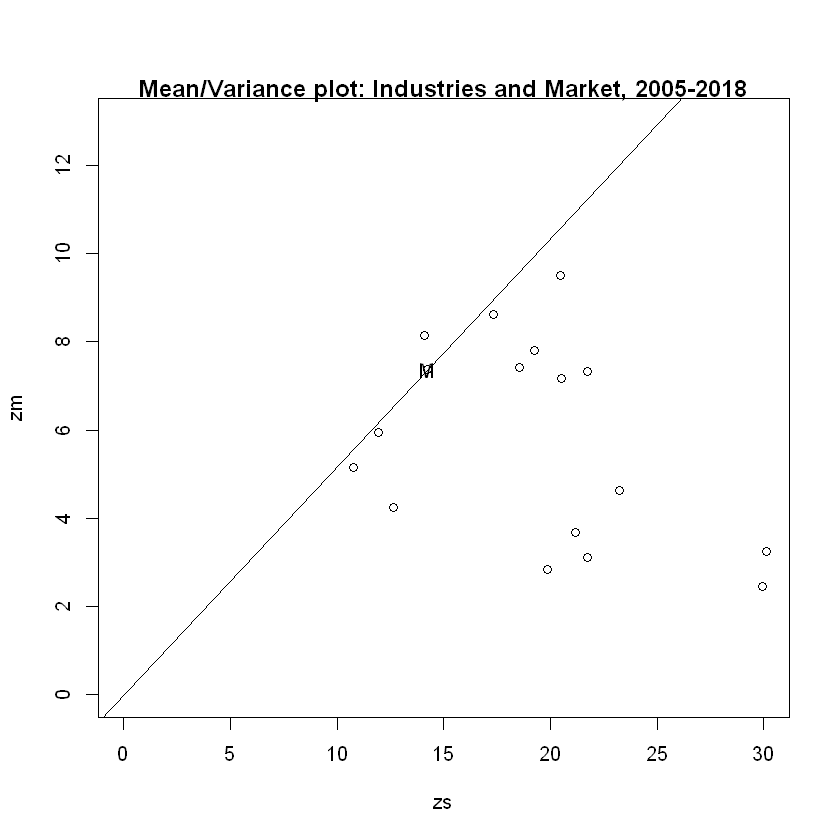

In [2]:
plot(zs,zm,xlim=range(c(0,30)),ylim=range(c(0,13))) 
points(zs[NN+1],zm[NN+1],pch="M")
abline(0,zm[NN+1]/zs[NN+1])
title("Mean/Variance plot: Industries and Market, 2005-2018",line=0.1)

In [3]:
rets<- rets[rets[,1]>200900&rets[,1]<201400,]
TT    <-length(rets[,1])
mregs <-lsfit(rets[,NN+2],rets[,2:(NN+1)]) 
alphs <-mregs$coefficients[1,]
betas <-mregs$coefficients[2,]
xdat  <-cbind(rep(1,length(rets[,1])),rets[,NN+2]) 
xpxinv<-solve(t(xdat)%*%xdat) 
Omga  <-cov(mregs$residuals)%x%xpxinv
covbet  <-Omga[seq(2,2*NN,by=2),seq(2,2*NN,by=2)]
covalph <-Omga[seq(1,2*NN-1,by=2),seq(1,2*NN-1,by=2)]
sigbetas<-sqrt(diag(covbet)*(TT-1)/(TT-2))

print("---------------Beta STD--------------")
sigbetas
print("---------------Beta Quantitles--------------")
quantile(sigbetas)

[1] "---------------Beta STD--------------"


[1] 0.05235059 0.17535925 0.08119592 0.11905503 0.10192782 0.08674647
 [7] 0.06743553 0.09719564 0.11159696 0.07281308 0.06719441 0.13885363
[13] 0.05534516 0.07862952 0.06124717 0.06930888

[1] "---------------Beta Quantitles--------------"


0%        25%        50%        75%       100% 
0.05235059 0.06737525 0.07991272 0.10434510 0.17535925

In [4]:
write.csv(
round(cbind(
12*alphs,  alphs/sqrt(diag(covalph)*(TT-1)/(TT-2)),
betas, (betas-1)/sigbetas
),2),file="table1.csv")

In [5]:
# t cut-off
print("---------------t Cut-off--------------")
qt(0.05/2,60-2)

# Bonferonni cutoff
print("---------------Bonferonni Cut-off--------------")
qt((0.05/NN)/2,TT-2)

# Hotelling cut-off
NN<-16
print("---------------Hotelling Cut-off--------------")
sqrt((TT-1)*NN*qf(0.95,NN,TT-NN)/(TT-NN))
#sqrt(qchisq(0.95,NN))

[1] "---------------t Cut-off--------------"


[1] -2.001717

[1] "---------------Bonferonni Cut-off--------------"


[1] -3.084084

[1] "---------------Hotelling Cut-off--------------"


[1] 6.349875

## 30 Industies

In [6]:
indus2<-read.csv("30indus-mon.csv")
print("---------------Industry Names--------------")
names(indus2)
print("---------------Data Dimension--------------")
dim(indus2)
print("---------------Time Range--------------")
range(indus2[,1]) 

rets <-indus2
NN <- length(indus2[1,])-3
rets[,2:(NN+1)]<-rets[,2:(NN+1)]-rets[,(NN+3)]

rets  <- rets[rets[,1]>200900&rets[,1]<201400,]
TT    <- length(rets[,1])
mregs <- lm(as.matrix(rets[,2:(NN+1)])~rets[,NN+2])
alphs <-coef(mregs)[1,]
betas <-coef(mregs)[2,]

rsquares<-lapply(summary(mregs),'[','r.squared')
print("---------------R-sqaure Quantile--------------")
quantile(unlist(rsquares))
print("---------------Average R-sqaure--------------")
mean(unlist(rsquares))

stdbetas<-sapply(lapply(summary(mregs),coefficients),'[',4)
print("---------------Beta STD--------------")
mean(unlist(stdbetas)) 

[1] "---------------Industry Names--------------"


[1] "date"  "Food"  "Beer"  "Smoke" "Games" "Books" "Hshld" "Clths" "Hlth" 
[10] "Chems" "Txtls" "Cnstr" "Steel" "FabPr" "ElcEq" "Autos" "Carry" "Mines"
[19] "Coal"  "Oil"   "Util"  "Telcm" "Servs" "BusEq" "Paper" "Trans" "Whlsl"
[28] "Rtail" "Meals" "Fin"   "Other" "Xrm"   "Rf"

[1] "---------------Data Dimension--------------"


[1] 1110   33

[1] "---------------Time Range--------------"


[1] 192607 201812

[1] "---------------R-sqaure Quantile--------------"


0%       25%       50%       75%      100% 
0.3702051 0.6113930 0.7206582 0.8092539 0.8721494

[1] "---------------Average R-sqaure--------------"


[1] 0.6856072

[1] "---------------Beta STD--------------"


[1] 0.09931023

In [7]:
# Correlations of industries and residuals

zcors<-unique(sort(cor(rets[,2:(NN+1)])))
zcors<-zcors[zcors<1]
print("---------------Return Correlation--------------")
zcors

rescors<-unique(sort(cor(mregs$residuals)))
rescors<-rescors[rescors<1]
print("---------------Residual Correlation--------------")
rescors

[1] "---------------Return Correlation--------------"


[1] 0.2288937 0.2620688 0.2633861 0.3070306 0.3222354 0.3437707 0.3450906
  [8] 0.3541113 0.3553760 0.3560016 0.3758043 0.3829236 0.3901303 0.3904092
 [15] 0.3961149 0.3999387 0.4019246 0.4034096 0.4041469 0.4062346 0.4067354
 [22] 0.4091598 0.4125405 0.4153850 0.4166285 0.4173348 0.4176853 0.4213705
 [29] 0.4236164 0.4240695 0.4245336 0.4252634 0.4273700 0.4356444 0.4358039
 [36] 0.4439006 0.4440316 0.4450230 0.4463206 0.4534735 0.4541276 0.4549025
 [43] 0.4549184 0.4553780 0.4574099 0.4681632 0.4712113 0.4737997 0.4750174
 [50] 0.4761910 0.4775922 0.4786537 0.4820844 0.4821338 0.4852557 0.4875029
 [57] 0.4882135 0.4884194 0.4892327 0.4902036 0.4913880 0.4933488 0.4942069
 [64] 0.4955321 0.4957092 0.4970932 0.4981332 0.5011137 0.5064493 0.5075480
 [71] 0.5087690 0.5159474 0.5191417 0.5220184 0.5233077 0.5240091 0.5273519
 [78] 0.5288866 0.5314437 0.5337679 0.5344246 0.5366542 0.5384512 0.5445316
 [85] 0.5445979 0.5448670 0.5459989 0.5481894 0.5483068 0.5488097 0.5493528
 [92] 0.5547948 0.5593322 0.5605281 0.5617550 0.5628412 0.5693839 0.5702004
 [99] 0.5712577 0.5724595 0.5730227 0.5744174 0.5759289 0.5800488 0.5803705
[106] 0.5825454 0.5829097 0.5830269 0.5862033 0.5867891 0.5871394 0.5887312
[113] 0.5887991 0.5901098 0.5909531 0.5910180 0.5917307 0.5922434 0.5928209
[120] 0.5944321 0.5965273 0.5989647 0.6022083 0.6053822 0.6058896 0.6069435
[127] 0.6093382 0.6102951 0.6103732 0.6159343 0.6172040 0.6180612 0.6240934
[134] 0.6248991 0.6252458 0.6267164 0.6269834 0.6292718 0.6295237 0.6303927
[141] 0.6328098 0.6339860 0.6341639 0.6362411 0.6375524 0.6394244 0.6415176
[148] 0.6420796 0.6446823 0.6447550 0.6457502 0.6480301 0.6484546 0.6510023
[155] 0.6512951 0.6537102 0.6540065 0.6550110 0.6579834 0.6587429 0.6589525
[162] 0.6590121 0.6590475 0.6617991 0.6637225 0.6643465 0.6643524 0.6654612
[169] 0.6661482 0.6669880 0.6674990 0.6683235 0.6691769 0.6705064 0.6756110
[176] 0.6766299 0.6783402 0.6822899 0.6824221 0.6825727 0.6825901 0.6826679
[183] 0.6852369 0.6854658 0.6854838 0.6864793 0.6869967 0.6871346 0.6871698
[190] 0.6879893 0.6885400 0.6894933 0.6901510 0.6932077 0.6963159 0.6972282
[197] 0.6979680 0.6989766 0.6990280 0.7001320 0.7012344 0.7022787 0.7022874
[204] 0.7028187 0.7030317 0.7033350 0.7060180 0.7063441 0.7075305 0.7085782
[211] 0.7093767 0.7093932 0.7105878 0.7109640 0.7134762 0.7166709 0.7167615
[218] 0.7187918 0.7197472 0.7201165 0.7210569 0.7217152 0.7224420 0.7231926
[225] 0.7240470 0.7243067 0.7255557 0.7258051 0.7259605 0.7264006 0.7268527
[232] 0.7299114 0.7300361 0.7303857 0.7307221 0.7323010 0.7328998 0.7332171
[239] 0.7336714 0.7338160 0.7359020 0.7360757 0.7372475 0.7381391 0.7383404
[246] 0.7384234 0.7389804 0.7389911 0.7396707 0.7421102 0.7422366 0.7427140
[253] 0.7440819 0.7459768 0.7460210 0.7467564 0.7474452 0.7491119 0.7497431
[260] 0.7505693 0.7509932 0.7516568 0.7530153 0.7535580 0.7549234 0.7552915
[267] 0.7553299 0.7559536 0.7565140 0.7565981 0.7568190 0.7581688 0.7583421
[274] 0.7585763 0.7594161 0.7595234 0.7602180 0.7604965 0.7620029 0.7630253
[281] 0.7638789 0.7646312 0.7648481 0.7648700 0.7652808 0.7661996 0.7673115
[288] 0.7680153 0.7691707 0.7694419 0.7695705 0.7701466 0.7706774 0.7732088
[295] 0.7741242 0.7745181 0.7757336 0.7763012 0.7763510 0.7768342 0.7768798
[302] 0.7770044 0.7784032 0.7785708 0.7797168 0.7800615 0.7817301 0.7819112
[309] 0.7828786 0.7850439 0.7861113 0.7867008 0.7870534 0.7871315 0.7877003
[316] 0.7877021 0.7878314 0.7895443 0.7902379 0.7908840 0.7910717 0.7914732
[323] 0.7916757 0.7924958 0.7952185 0.7954145 0.7964577 0.7976425 0.7976478
[330] 0.7982420 0.7986243 0.7991716 0.7996332 0.7997814 0.8004910 0.8006374
[337] 0.8006922 0.8010384 0.8024053 0.8026231 0.8034676 0.8050944 0.8051621
[344] 0.8074609 0.8083483 0.8087714 0.8106229 0.8111451 0.8113934 0.8114444
[351] 0.8143833 0.8143970 0.8146514 0.8163071 0.8168617 0.8182607 0.8189685
[358] 0.8194365 0.8227491 0.8233154 0.8239519 0.8243643 0.8258207 0.8270552
[365] 0.8278019 0.8290669 0.8291234 0.8298144 0.83

[1] "---------------Residual Correlation--------------"


[1] -0.618263055 -0.583457793 -0.545024436 -0.504897839 -0.491047504
  [6] -0.481631172 -0.469328836 -0.454635606 -0.454393829 -0.445514557
 [11] -0.445109486 -0.443825452 -0.414543248 -0.398913421 -0.397637860
 [16] -0.397442042 -0.389827253 -0.384346013 -0.373324285 -0.372548998
 [21] -0.368870953 -0.364773322 -0.363773101 -0.357960696 -0.347963345
 [26] -0.345779662 -0.343625847 -0.342246034 -0.341511196 -0.336740077
 [31] -0.336429837 -0.333169103 -0.323336789 -0.322843025 -0.317805132
 [36] -0.310602331 -0.301072409 -0.294325029 -0.287466006 -0.282649362
 [41] -0.281868377 -0.281744726 -0.278424549 -0.275802083 -0.275581005
 [46] -0.275291346 -0.272499194 -0.270542139 -0.269996804 -0.269925147
 [51] -0.268212825 -0.263067790 -0.259919427 -0.259593184 -0.259562667
 [56] -0.259443163 -0.256492048 -0.254438770 -0.253842440 -0.253572302
 [61] -0.249734425 -0.245084603 -0.244520000 -0.243890804 -0.240912140
 [66] -0.239305096 -0.238287466 -0.237555228 -0.235972411 -0.235577388
 [71] -0.235002750 -0.234482855 -0.233941188 -0.231400799 -0.228822463
 [76] -0.225625136 -0.217500464 -0.216096629 -0.212218628 -0.211487347
 [81] -0.210469856 -0.209988977 -0.208095835 -0.203582509 -0.201481548
 [86] -0.190378044 -0.186726863 -0.185377606 -0.183397621 -0.180230853
 [91] -0.179610424 -0.177887683 -0.176998515 -0.176210601 -0.173893218
 [96] -0.173536602 -0.170923574 -0.169920483 -0.169382800 -0.168199123
[101] -0.163664906 -0.162168848 -0.162109303 -0.161955513 -0.160905382
[106] -0.159561907 -0.159522863 -0.159024569 -0.158080829 -0.154218962
[111] -0.152885790 -0.151765096 -0.148143118 -0.144538621 -0.144020947
[116] -0.142505697 -0.141147351 -0.139818353 -0.139432424 -0.137271800
[121] -0.134747235 -0.132129505 -0.131921022 -0.127603069 -0.120753564
[126] -0.119774803 -0.119403262 -0.119099266 -0.112647495 -0.112478479
[131] -0.112146421 -0.109569674 -0.109370987 -0.105556914 -0.105461408
[136] -0.105004749 -0.104981817 -0.101411724 -0.101037571 -0.099975837
[141] -0.097186786 -0.095774164 -0.093841418 -0.091063351 -0.090053670
[146] -0.083967357 -0.083071691 -0.082986364 -0.082693495 -0.082254397
[151] -0.080329292 -0.079608153 -0.076806688 -0.075923407 -0.075798531
[156] -0.074211043 -0.070520525 -0.069249574 -0.066433144 -0.064968448
[161] -0.062422322 -0.060902319 -0.060882553 -0.060033393 -0.059397129
[166] -0.059166413 -0.057998564 -0.057298969 -0.056486917 -0.056430442
[171] -0.056423620 -0.056245063 -0.052676175 -0.046142080 -0.039238690
[176] -0.039229902 -0.038878813 -0.038813563 -0.035728822 -0.034907994
[181] -0.033013036 -0.031393890 -0.031083386 -0.030218509 -0.028204448
[186] -0.028114990 -0.027994832 -0.026555092 -0.026336374 -0.026020309
[191] -0.023544514 -0.018954280 -0.016525307 -0.016288110 -0.016166282
[196] -0.013235691 -0.011084775 -0.009667271 -0.008230268 -0.006889463
[201] -0.005759113 -0.002836789 -0.002430469 -0.002294400 -0.001914544
[206]  0.002093653  0.003966513  0.006390211  0.009098784  0.015344515
[211]  0.015808864  0.019769840  0.021718132  0.022112349  0.022670065
[216]  0.023804965  0.024093376  0.026783189  0.027722080  0.029197665
[221]  0.029847455  0.032799284  0.033438062  0.035556690  0.038302949
[226]  0.038875265  0.039356914  0.040392134  0.041184195  0.041423279
[231]  0.042018380  0.044797917  0.044904842  0.046025695  0.046581247
[236]  0.049204193  0.051638994  0.055251337  0.056472353  0.057665221
[241]  0.058566958  0.058777217  0.060727921  0.061927710  0.062082746
[246]  0.064558368  0.069861768  0.071119419  0.071983660  0.072453099
[251]  0.072821817  0.074369415  0.075054412  0.076790439  0.077064313
[256]  0.077916953  0.079756466  0.080747092  0.081719884  0.082612746
[261]  0.084924607  0.087432200  0.088033900  0.089433508  0.091261226
[266]  0.094065488  0.096930790  0.097977568  0.099673853  0.105367991
[271]  0.106875982  0.107087155  0.107585833  0.108417609  0.108834667
[276]  0.111526149  0.113546985  0.113721981  0.116003907  0.119876316
[281]  0.119962245  0.1203

In [8]:
# Hotelling T2 test: SUR framewok to get the 30x30 Covmat of the betas_MLE

xdat  <-cbind(rep(1,length(rets[,1])),rets[,NN+2]) 
xpxinv<-solve(t(xdat)%*%xdat) 
Omga  <-cov(mregs$residuals)%x%xpxinv

covbet  <-Omga[seq(2,2*NN,by=2),seq(2,2*NN,by=2)]
covalph <-Omga[seq(1,2*NN-1,by=2),seq(1,2*NN-1,by=2)]
sigbetas<-sqrt(diag(covbet)*(TT-1)/(TT-2))
print("---------------Beta STD--------------")
sigbetas
print("---------------Average Beta STD--------------")
mean(sigbetas)

[1] "---------------Beta STD--------------"


[1] 0.05685224 0.07904579 0.10340817 0.13440709 0.12445619 0.07303324
 [7] 0.12167842 0.06761954 0.08090115 0.22330392 0.09766868 0.11201678
[13] 0.08901623 0.09128778 0.17302344 0.07823408 0.18231904 0.26593572
[19] 0.08074367 0.07709724 0.05938803 0.05434772 0.07281320 0.06134751
[25] 0.07200320 0.05380618 0.06605608 0.06725405 0.06926144 0.09098099

[1] "---------------Average Beta STD--------------"


[1] 0.09931023

In [9]:
# The matrix of coefficient constraints

Rmat<-toeplitz(c(1,-1,rep(0,28)))
Rmat[lower.tri(Rmat)]<-0
Rmat<-Rmat[1:29,]

constcov<-Rmat %*% covbet %*% t(Rmat)
constvec<-Rmat %*% betas

HotTea<- t(constvec) %*% solve(constcov) %*% constvec
print("---------------Hotelling T-square--------------")
HotTea
print("---------------Hotelling T Cut-off--------------")
((60-1)/(60-29)) *
29* qf(0.95,29,60-29)

[1] "---------------Hotelling T-square--------------"


302.8014


[1] "---------------Hotelling T Cut-off--------------"


[1] 101.2767

In [10]:
# Hotelling T2 for the alpha=0 hypothesis

HotTeaA <- t(alphs) %*% solve(covalph) %*% alphs
print("---------------Hotelling T-square for alpha=0 Hypothesis--------------")
HotTeaA
print("---------------Hotelling T Cut-off for alpha=0 Hypothesis--------------")
(60-1)*30*qf(0.95,30,60-30)/(60-30)

[1] "---------------Hotelling T-square for alpha=0 Hypothesis--------------"


85.36609


[1] "---------------Hotelling T Cut-off for alpha=0 Hypothesis--------------"


[1] 108.6114

## 47 Industries

In [11]:
# Stability of Betas

indus3<-read.csv("47indus-mon.csv")
print("---------------Data Dimension--------------")
dim(indus3)
print("---------------Time Range--------------")
range(indus3[,1])

rets<-indus3
NN <- length(indus[1,])-3
rets[,2:(NN+1)]<-rets[,2:(NN+1)]-rets[,(NN+3)]

zm<-apply(rets[,2:49],2,mean)*12
zs<-apply(rets[,2:49],2,sd)*sqrt(12)

print("---------------Annulized Return--------------")
zm
print("---------------Annulized Volatility(%)--------------")
zs

[1] "---------------Data Dimension--------------"


[1] 588  50

[1] "---------------Time Range--------------"


[1] 197001 201812

[1] "---------------Annulized Return--------------"


Agric       Food       Soda       Beer      Smoke       Toys        Fun 
 1.0732653  2.4328571  2.8961224  2.8622449  6.1995918 -1.6191837  5.4397959 
     Books      Hshld      Clths       Hlth      MedEq      Drugs      Chems 
-0.2777551 -0.3312245  2.5781633  0.9771429  1.6718367  2.2648980  1.9900000 
     Rubbr      Txtls      BldMt      Cnstr      Steel      FabPr       Mach 
 1.7977551  1.0459184 11.6563265 10.4004082  8.6126531  8.9046939 11.6975510 
     ElcEq      Autos       Aero      Ships       Guns       Gold      Mines 
13.3993878  9.9108163 14.7881633 12.9236735 15.5777551 11.0006122 11.5502041 
      Coal        Oil       Util      Telcm      PerSv      BusSv      Comps 
12.1212245 12.0755102 10.8459184 11.2465306  7.3589796 12.9383673 10.5071429 
     Chips      LabEq      Paper      Boxes      Trans      Whlsl      Rtail 
12.5773469 12.2485714 11.6412245 11.5853061 11.8685714 11.0918367 12.8428571 
     Meals      Banks      Insur      RlEst        Fin        Xrm 
12.6212245 11.6583673 12.7261224  6.1995918 13.0318367  6.3722449

[1] "---------------Annulized Volatility(%)--------------"


Agric     Food     Soda     Beer    Smoke     Toys      Fun    Books 
22.20848 21.88134 25.28608 23.06250 26.21992 20.55931 21.88553 17.93381 
   Hshld    Clths     Hlth    MedEq    Drugs    Chems    Rubbr    Txtls 
20.30649 19.09344 24.20053 20.14111 22.48341 17.69992 17.91905 21.18846 
   BldMt    Cnstr    Steel    FabPr     Mach    ElcEq    Autos     Aero 
21.73363 24.99014 26.39270 25.19302 22.05852 21.91918 24.04717 22.99176 
   Ships     Guns     Gold    Mines     Coal      Oil     Util    Telcm 
25.64242 22.60697 37.47100 26.35387 37.57664 19.49276 14.04816 16.43853 
   PerSv    BusSv    Comps    Chips    LabEq    Paper    Boxes    Trans 
23.12871 22.65045 24.61520 26.18332 24.66616 19.26456 19.97134 20.15646 
   Whlsl    Rtail    Meals    Banks    Insur    RlEst      Fin      Xrm 
18.91233 19.16374 20.84214 20.98832 19.08725 26.97492 21.66147 15.63919

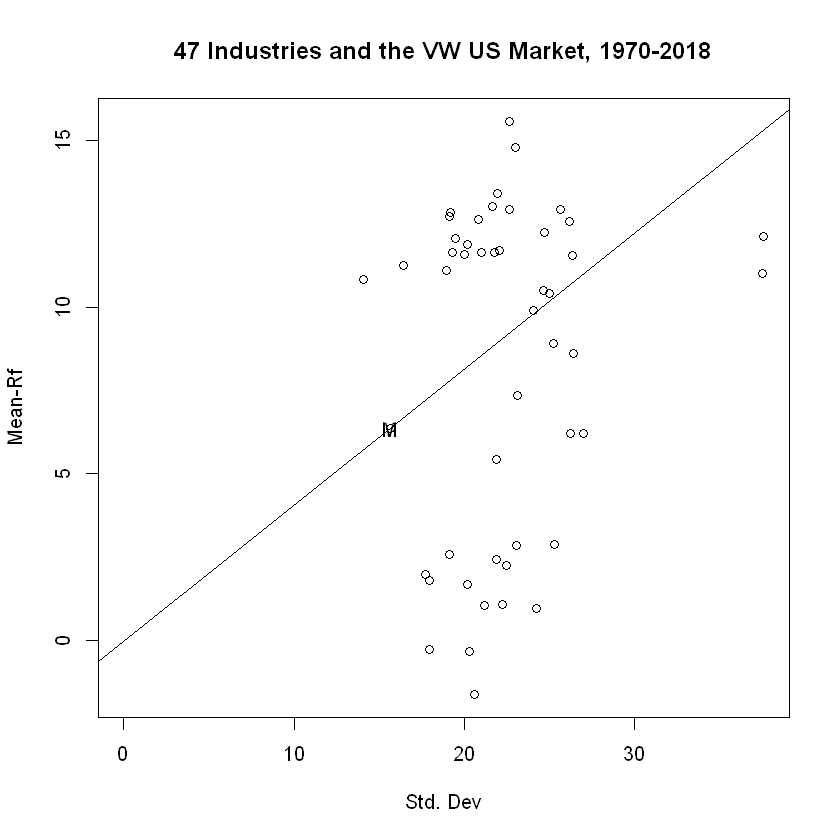

In [12]:
plot(zs,zm,xlim=c(0,max(zs)),ylim=range(c(0,zm)),xlab="Std. Dev",ylab="Mean-Rf") 
title("47 Industries and the VW US Market, 1970-2018")
points(zs[48],zm[48],pch="M") 
abline(0,zm[48]/zs[48])

[1] "---------------Regression Coefficients--------------"


Intercept          X 
-0.2125097  0.5583668

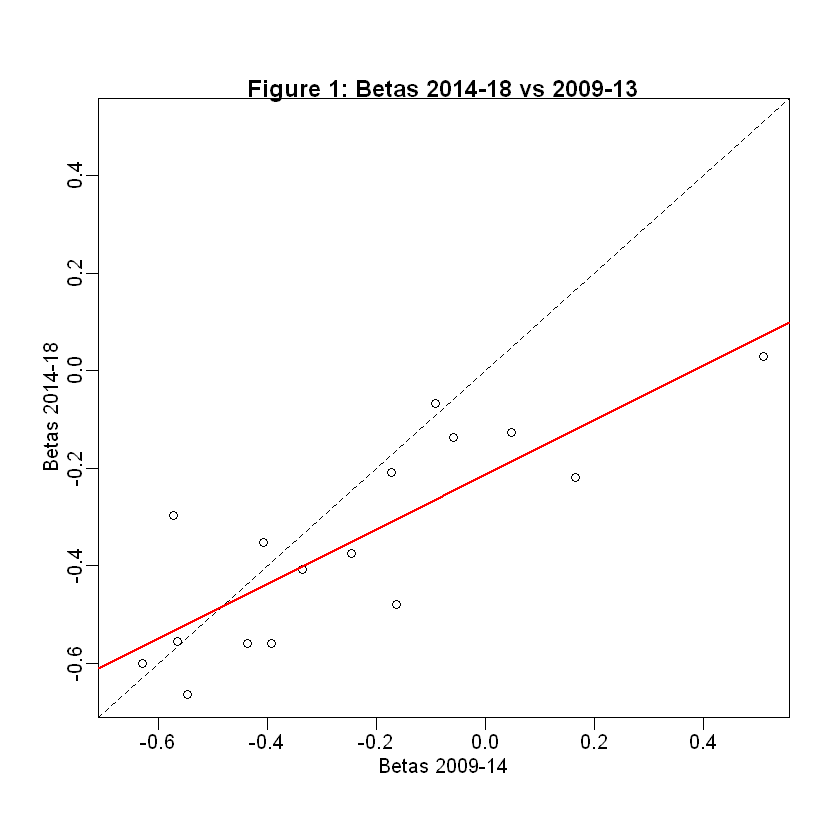

In [13]:
# Get beta 1 and beta 2 for the 2 5-year periods

zret1 <- rets[rets[,1]>200900&rets[,1]<201400,]
zret2 <- rets[rets[,1]>201400&rets[,1]<201900,]
TT    <- length(zret1[,1])
beta1<-lsfit(zret1[,NN+2],zret1[,2:(NN+1)])$coefficients[2,]
beta2<-lsfit(zret2[,NN+2],zret2[,2:(NN+1)])$coefficients[2,]

print("---------------Regression Coefficients--------------")
lsfit(beta1,beta2)$coefficients

par(mgp=c(1.5,0.5,0))
zrange<-range(c(beta1,beta2))
plot(beta1,beta2, xlim=zrange,ylim=zrange,xlab="Betas 2009-14",ylab="Betas 2014-18")
abline(0,1,lty=2)
abline(lsfit(beta1,beta2),col="red",lwd=2)
title("Figure 1: Betas 2014-18 vs 2009-13",line=0.1)

[1] "---------------Regression Summary--------------"
Residual Standard Error=0.2889
R-Square=0.0023
F-statistic (df=1, 126)=0.2884
p-value=0.5922

          Estimate Std.Err t-value Pr(>|t|)
Intercept  -0.2542  0.0342 -7.4367   0.0000
X           0.0497  0.0925  0.5371   0.5922




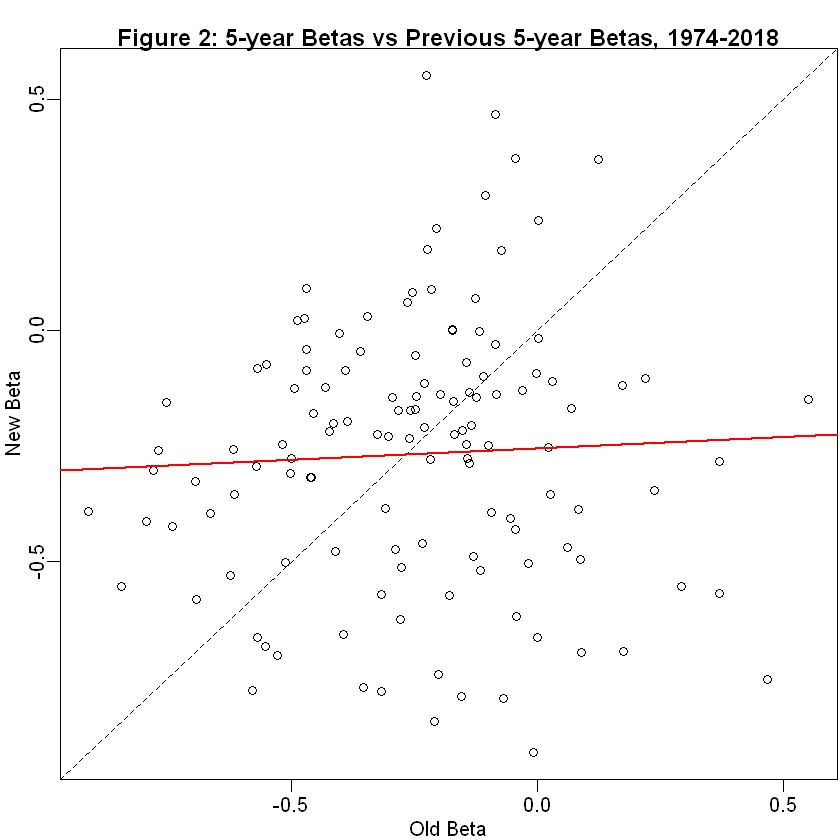

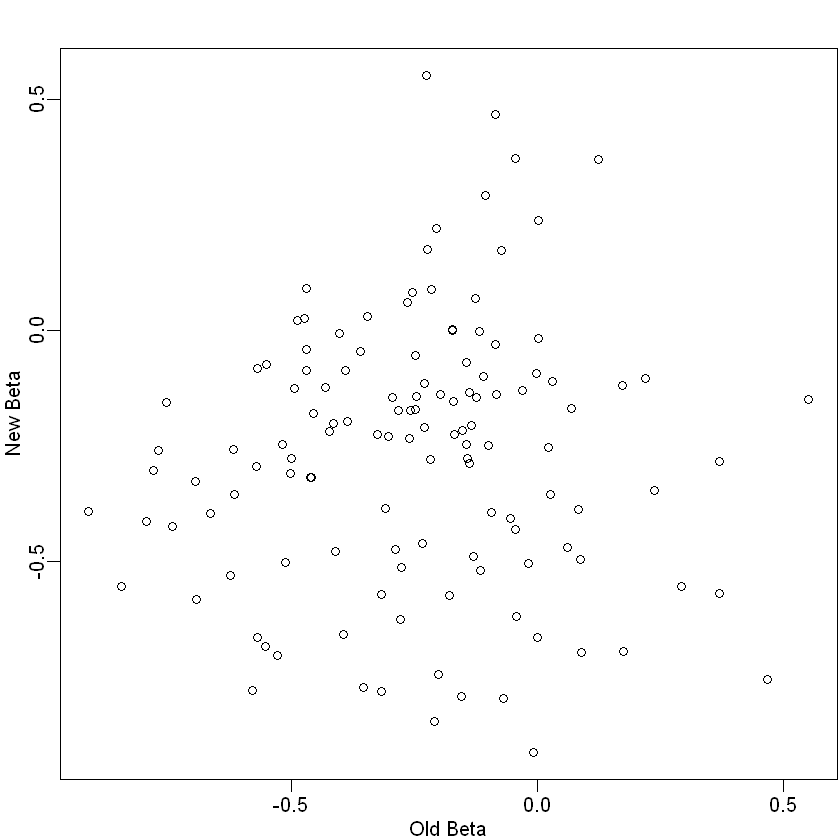

In [14]:
# 9 periods from 1974

zrets <-rets[rets[,1]>197400,]

betas<-matrix(0,nrow=9,ncol=NN)
for (ii in 1:9) {
    ivec<-seq(60*(ii-1)+1,60*ii)
    betas[ii,]<-lsfit(rets[ivec,NN+2],rets[ivec,2:(NN+1)])$coefficients[2,]
}

newbets <-c((betas[2:9,]))
oldbets <-c((betas[1:8,]))

par(mgp=c(1.5,0.5,0),mar=c(2.5,2.5,2,0.1))
zrange<-range(oldbets,newbets)
plot(oldbets,newbets,xlim=zrange,ylim=zrange,xlab="Old Beta",ylab="New Beta")
abline(0,1,lty=2)
abline(lsfit(oldbets,newbets),lwd=2,col="red")
title("Figure 2: 5-year Betas vs Previous 5-year Betas, 1974-2018",line=0.1)

print("---------------Regression Summary--------------")
ls.print(lsfit(oldbets,newbets))

plot(betas[1:8,],betas[2:9,],xlab="Old Beta",ylab="New Beta")